In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.fft import fft

In [29]:
# this data contains stacked entries of the same labels to increase the feature-set size

In [30]:
df = pd.read_csv('test_5.csv')

In [31]:
numeric_columns = ['TCP_Window_Size','PortTyp_Dst','Pck_Size','Payload_Len','Entropy']
non_numeric_columns = ['Label']

In [32]:
def apply_fft(df,columns):
    fft_features = pd.DataFrame()
    for col in columns:
        fft_values = np.abs(fft(df[col].values))
        fft_features[col + '_fft'] = fft_values[:len(fft_values)//2]
    return fft_features

In [33]:
fft_data = apply_fft(df,numeric_columns)

In [34]:
df.columns

Index(['ARP', 'IP', 'ICMP6', 'TCP', 'UDP', 'TCP_Window_Size', 'HTTP', 'DHCP',
       'BOOTP', 'SSDP', 'DNS', 'MDNS', 'NTP', 'PortTyp_Src', 'PortTyp_Dst',
       'Pck_Size', 'Pck_Rawdata', 'Payload_Len', 'Entropy', 'ARP.1', 'IP.1',
       'ICMP6.1', 'TCP.1', 'UDP.1', 'TCP_Window_Size.1', 'HTTP.1', 'DHCP.1',
       'BOOTP.1', 'SSDP.1', 'DNS.1', 'MDNS.1', 'NTP.1', 'PortTyp_Src.1',
       'PortTyp_Dst.1', 'Pck_Size.1', 'Pck_Rawdata.1', 'Payload_Len.1',
       'Entropy.1', 'ARP.2', 'IP.2', 'ICMP6.2', 'TCP.2', 'UDP.2',
       'TCP_Window_Size.2', 'HTTP.2', 'DHCP.2', 'BOOTP.2', 'SSDP.2', 'DNS.2',
       'MDNS.2', 'NTP.2', 'PortTyp_Src.2', 'PortTyp_Dst.2', 'Pck_Size.2',
       'Pck_Rawdata.2', 'Payload_Len.2', 'Entropy.2', 'ARP.3', 'IP.3',
       'ICMP6.3', 'TCP.3', 'UDP.3', 'TCP_Window_Size.3', 'HTTP.3', 'DHCP.3',
       'BOOTP.3', 'SSDP.3', 'DNS.3', 'MDNS.3', 'NTP.3', 'PortTyp_Src.3',
       'PortTyp_Dst.3', 'Pck_Size.3', 'Pck_Rawdata.3', 'Payload_Len.3',
       'Entropy.3', 'ARP.4', 'IP.4',

In [35]:
data = df[['TCP_Window_Size','Pck_Size','PortTyp_Dst','Payload_Len','Entropy',
          'TCP_Window_Size.1','Pck_Size.1','PortTyp_Dst.1','Payload_Len.1','Entropy.1',
          'TCP_Window_Size.2','Pck_Size.2','PortTyp_Dst.2','Payload_Len.2','Entropy.2',
          'TCP_Window_Size.3','Pck_Size.3','PortTyp_Dst.3','Payload_Len.3','Entropy.3',
          'TCP_Window_Size.4','Pck_Size.4','PortTyp_Dst.4','Payload_Len.4','Entropy.4']]

In [36]:
X = pd.concat([fft_data,data],axis = 1) # including the fft features to improve the accuracy even further
# X = data
y = df['Label']

In [37]:
X.shape

(16000, 30)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [39]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encded = label_encoder.fit_transform(y_test)

In [40]:
classifiers = {
    "Decision Tree" : DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_split = 10, random_state = 0),
    "Random Forest" : RandomForestClassifier(n_estimators = 150, max_depth = 15, criterion = 'entropy', random_state = 42)
}

In [41]:
# clf_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 22, min_samples_split = 4, random_state = None)
clf_dt = DecisionTreeClassifier(class_weight = None, criterion = 'gini', max_depth = 22,
                                                         max_features = 20, max_leaf_nodes = None,
                                                         min_impurity_decrease = 0.0,
                                                         min_samples_leaf = 1, min_samples_split = 4,
                                                         min_weight_fraction_leaf = 0.0,
                                                         random_state = None, splitter = 'best')
# clf_rf = RandomForestClassifier(n_estimators = 75, criterion = 'entropy', min_samples_split = 10, random_state = None)
clf_rf = RandomForestClassifier(bootstrap = True, class_weight = None,
                                                         criterion = 'gini', min_impurity_decrease=0.0,
                                                         min_samples_leaf = 1, min_samples_split = 10,
                                                         min_weight_fraction_leaf = 0.0, n_estimators = 70,
                                                         n_jobs = None, oob_score = False, random_state = None,
                                                         verbose = 0, warm_start = False)

In [42]:
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)

In [43]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
recall = metrics.recall_score(y_test, y_pred, average = 'macro')
f1_score = metrics.f1_score(y_test,y_pred,average='macro')

# printing the metrics (macro values for precision, recall and F1-Score)
print(f'Metrics for the Decision Tree Classifier: ')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1_Score: {f1_score:.4f}')

Metrics for the Decision Tree Classifier: 
Accuracy: 0.9346
Precision: 0.9353
Recall: 0.9351
F1_Score: 0.9347


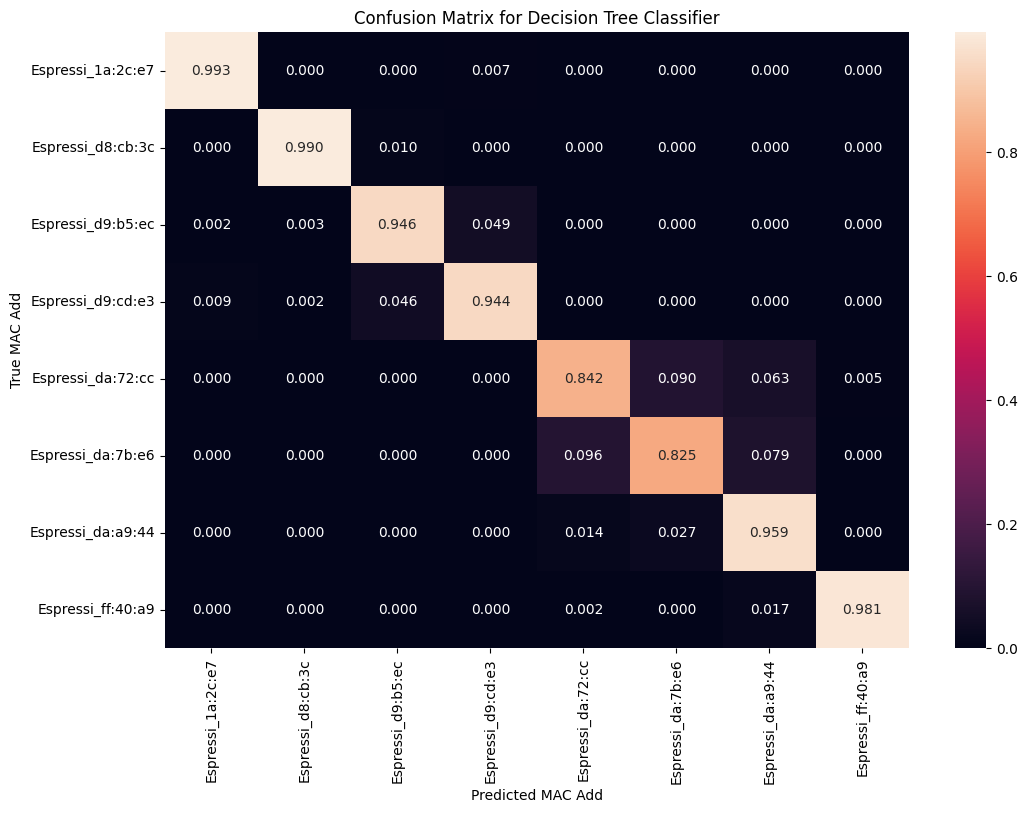

<Figure size 640x480 with 0 Axes>

In [44]:
# making the confusion matrix for the same
cnf_matrix_dt = metrics.confusion_matrix(y_test,y_pred)
normalized_cnf_matrix_dt = cnf_matrix_dt.astype('float')/cnf_matrix_dt.sum(axis=1)[:,np.newaxis]
plt.figure(figsize=(12,8))
sns.heatmap(normalized_cnf_matrix_dt,annot = True, fmt = '.3f',
            xticklabels = label_encoder.classes_,
            yticklabels = label_encoder.classes_)
plt.xlabel('Predicted MAC Add')
plt.ylabel('True MAC Add')
plt.title(f'Confusion Matrix for Decision Tree Classifier')
plt.show()
plt.savefig('DT Classifier (FFT + Stacking)')

In [45]:
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)

In [46]:
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test, y_pred, average = 'macro')
recall = metrics.recall_score(y_test, y_pred, average = 'macro')
f1_score = metrics.f1_score(y_test,y_pred,average='macro')

# printing the metrics (macro values for precision, recall and F1-Score)
print(f'Metrics for the Random Forest (Ensemble) Classifier: ')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1_Score: {f1_score:.4f}')

Metrics for the Random Forest (Ensemble) Classifier: 
Accuracy: 0.9602
Precision: 0.9606
Recall: 0.9607
F1_Score: 0.9605


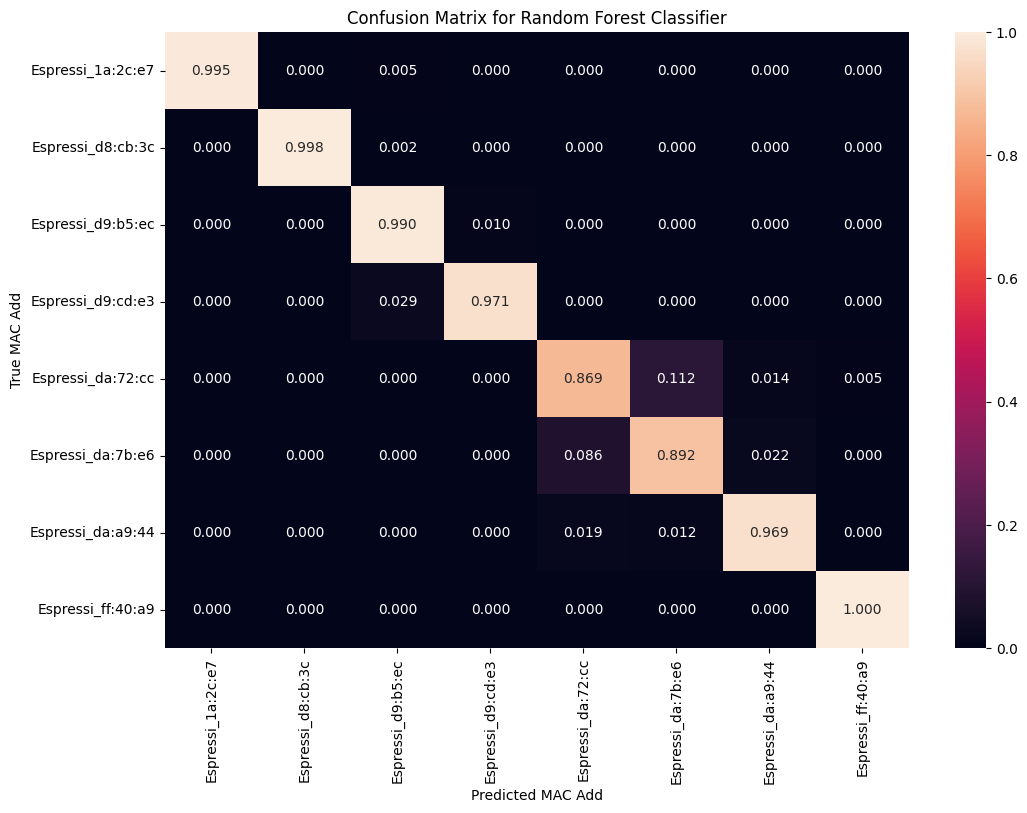

<Figure size 640x480 with 0 Axes>

In [47]:
# making the confusion matrix for the same
cnf_matrix_rf = metrics.confusion_matrix(y_test,y_pred)
normalized_cnf_matrix_rf = cnf_matrix_rf.astype('float')/cnf_matrix_rf.sum(axis=1)[:,np.newaxis]
plt.figure(figsize=(12,8))
sns.heatmap(normalized_cnf_matrix_rf,annot = True, fmt = '.3f',
            xticklabels = label_encoder.classes_,
            yticklabels = label_encoder.classes_)
plt.xlabel('Predicted MAC Add')
plt.ylabel('True MAC Add')
plt.title(f'Confusion Matrix for Random Forest Classifier')
plt.show()
plt.savefig('RF Classifier (FFT + Stacking)')